Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its
application.

It is a way of data scaling, where the minimum of feature is made equal to zero and the maximum of feature equal to one. MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.

The MinMax scaling is done using:

x_std = (x – x.min(axis=0)) / (x.max(axis=0) – x.min(axis=0))

x_scaled = x_std * (max – min) + min

 It brings all features to a similar scale, preventing features with larger magnitudes from dominating the learning process.  It helps algorithms converge faster during training, especially gradient-based optimization algorithms like gradient descent. Min-Max scaling can help reduce the impact of outliers by rescaling the entire range of values.  It does not change the underlying distribution of the data, making it easier to interpret the transformed values. Many machine learning algorithms and models assume that the features are on a similar scale, making Min-Max scaling a compatible preprocessing step.
 
Below is an example illustrating its application:

In [14]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()
min_max = MinMaxScaler()
df1 = pd.DataFrame(min_max.fit_transform(df[['fare']]))

In [15]:
df1

,0
0,0.014151
1,0.139136
2,0.015469
3,0.103644
4,0.015713
...,...
886,0.025374
887,0.058556
888,0.045771
889,0.058556


Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling?
Provide an example to illustrate its application.

The Unit Vector technique, also known as vector normalization, is a feature scaling method used to transform the magnitude of each feature vector to be a unit length (i.e., a vector with a length of 1). It involves dividing each feature vector by its Euclidean norm (magnitude). This ensures that all feature vectors have the same scale and direction.

unit_vector = value / sqrt(sum(value^2))

 In Min-Max scaling, each feature is scaled to fit within a predefined range (e.g., [0, 1]). In contrast, unit vector scaling ensures that each feature vector has a unit length, regardless of its original magnitude. Unit vector scaling preserves the direction of each feature vector, whereas Min-Max scaling preserves the relative relationships between the original feature values but may change the direction of the feature vectors. While both techniques normalize the features, Min-Max scaling scales each feature independently, whereas unit vector scaling normalizes the entire feature vector.

Below is an example illustrating its application:

In [1]:
from sklearn.preprocessing import normalize
import seaborn as sns
import pandas as pd

df1 = sns.load_dataset('iris')


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df1_columns = list(df1.columns[df1.dtypes!='object'])
df1_columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [6]:
unit_vec = pd.DataFrame(normalize(df1[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]), columns=df1_columns)

In [7]:
unit_vec

,sepal_length,sepal_width,petal_length,petal_width
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an
example to illustrate its application.

Principal Component Analysis(PCA) technique works on the condition that while the data in a higher dimensional space is mapped to data in a lower dimension space, the variance of the data in the lower dimensional space should be maximum. Principal Component Analysis (PCA) is an unsupervised learning algorithm technique used to examine the interrelations among a set of variables. It is also known as a general factor analysis where regression determines a line of best fit. Principal Component Analysis (PCA) is used to reduce the dimensionality of a data set by finding a new set of variables, smaller than the original set of variables, retaining most of the sample’s information, and useful for the regression and classification of data.

The main idea behind PCA is to identify a set of new variables, called principal components, that explain the maximum amount of variance in the original data. These principal components are linear combinations of the original variables and are orthogonal to each other. The first principal component captures the direction of the maximum variance in the data, while the subsequent principal components capture the remaining variance in decreasing order.

PCA can be used for various applications such as exploratory data analysis, data visualization, and feature extraction for machine learning algorithms. It is particularly useful in reducing the dimensionality of high-dimensional datasets, where the number of features exceeds the number of observations, and in cases where there are strong correlations among the features.


Original Dataset 
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Transformed X Data 
         PC1       PC2
0 -2.264703  0.480027
1 -2.080961 -0.674134
2 -2.364229 -0.341908
3 -2.299384 -0.597395
4 -2.389842  0.646835


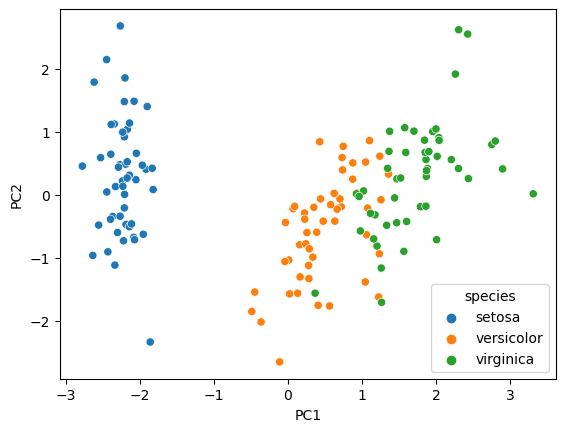

In [6]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

iris = sns.load_dataset('iris')
print('Original Dataset \n', iris.head())

X = iris.drop(labels=['species'], axis=1)
Y = iris[['species']]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

pca = PCA(n_components = 2)
X_pca = pd.DataFrame(pca.fit_transform(X_scaled), columns = ['PC1', 'PC2'])

print('Transformed X Data \n', X_pca.head())

df_pca = pd.concat([X_pca,Y],axis=1)
sns.scatterplot(data=df_pca,x='PC1',y='PC2', hue='species')
plt.show()

Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature
Extraction? Provide an example to illustrate this concept.

PCA (Principal Component Analysis) is a technique commonly used for feature extraction, particularly in the context of dimensionality reduction. Feature extraction involves transforming the original features of a dataset into a new set of features, which typically have fewer dimensions and capture the most important information in the data.

- PCA is primarily used for dimensionality reduction, where the goal is to reduce the number of features (dimensions) in the dataset while preserving as much variance (information) as possible. By projecting the original high-dimensional data onto a lower-dimensional subspace defined by the principal components, PCA effectively extracts a compressed representation of the data that retains most of its variability.
- The principal components obtained through PCA serve as the new features in the transformed feature space. These principal components are linear combinations of the original features and are orthogonal (uncorrelated) to each other, allowing them to capture different aspects of the data.
- PCA transforms the original feature space into the space defined by the principal components, effectively projecting the data onto a lower-dimensional subspace. This transformation redefines the features in terms of the principal components, allowing for a more compact representation of the data that facilitates visualization, analysis, and model building.

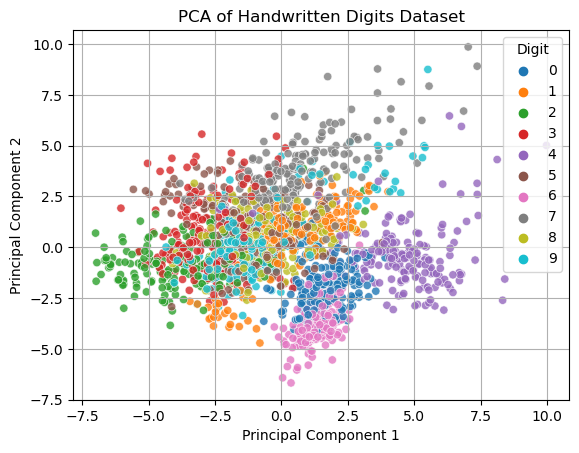

Variance explained by each principal component:
[0.12033916 0.09561054]


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# Create a DataFrame for visualization
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Digit'] = y.astype(str)

# Plot the data
#plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Digit', data=df_pca, palette='tab10', alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Handwritten Digits Dataset')
plt.legend(title='Digit')
plt.grid()
plt.show()

# Variance explained by each principal component
print("Variance explained by each principal component:")
print(PCA(n_components=2).fit(X_scaled).explained_variance_ratio_)

Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset
contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to
preprocess the data.

In the context of building a recommendation system for a food delivery service, Min-Max scaling can be used to preprocess the dataset containing features such as price, rating, and delivery time. 

Before applying any preprocessing techniques, it's essential to understand the distribution and characteristics of the data. Analyze the range and distribution of each feature (price, rating, delivery time) to determine if scaling is necessary.

Once you've decided to scale the features, apply Min-Max scaling to each feature independently. You can implement Min-Max scaling manually or using libraries like scikit-learn in Python. Here's how you can do it using scikit-learn:

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

food = pd.DataFrame({'Price': [100, 120, 110, 115, 125],
                    'Rating': [4.5, 4.6,4.8, 4, 2],
                    'Delivery Time': [30, 35, 40, 32, 38]})
print('Original Dataframe \n', food)

scaler = MinMaxScaler()
food_scaled = pd.DataFrame(scaler.fit_transform(food), columns = food.columns)

print('Dataframe after MinMax Scaling \n')
print(food_scaled)

Original Dataframe 
    Price  Rating  Delivery Time
0    100     4.5             30
1    120     4.6             35
2    110     4.8             40
3    115     4.0             32
4    125     2.0             38
Dataframe after MinMax Scaling 

   Price    Rating  Delivery Time
0    0.0  0.892857            0.0
1    0.8  0.928571            0.5
2    0.4  1.000000            1.0
3    0.6  0.714286            0.2
4    1.0  0.000000            0.8


Q6. You are working on a project to build a model to predict stock prices. The dataset contains many
features, such as company financial data and market trends. Explain how you would use PCA to reduce the
dimensionality of the dataset.

PCA (Principal Component Analysis) can be a powerful tool for reducing the dimensionality of a dataset in the context of predicting stock prices, especially when dealing with a large number of features.

- Understand the Dataset: Start by understanding the dataset containing features such as company financial data and market trends. Identify the variables that may be relevant for predicting stock prices, such as earnings, revenue, industry indicators, economic indicators, etc.
- Feature Selection: Before applying PCA, consider performing feature selection to identify the most important features for predicting stock prices. This step can help reduce the dimensionality of the dataset by excluding irrelevant or redundant features.
- Standardize the Features: Standardize the features to ensure that they have a mean of 0 and a standard deviation of 1. This step is important for PCA as it ensures that all features contribute equally to the analysis.
- Apply PCA: Once the features are standardized, apply PCA to the dataset. PCA will identify the principal components, which are linear combinations of the original features that capture the maximum variance in the data. These principal components represent the directions of maximum variability in the dataset.
- Select the Number of Components: Decide on the number of principal components to retain based on the explained variance ratio. The explained variance ratio indicates the proportion of variance in the data captured by each principal component. Typically, you would aim to retain enough principal components to explain a significant portion (e.g., 80-90%) of the total variance in the data.
- Transform the original features into the new feature space defined by the selected principal components. This step effectively reduces the dimensionality of the dataset, replacing the original features with a smaller set of principal components.


Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the
values to a range of -1 to 1.

In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

X =  np.array([1, 5, 10, 15, 20])

scaler = MinMaxScaler(feature_range=(-1,1))
df4 = scaler.fit_transform(X.reshape(-1,1))

print(df4.flatten())

[-1.         -0.57894737 -0.05263158  0.47368421  1.        ]


Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform
Feature Extraction using PCA. How many principal components would you choose to retain, and why?


In [2]:
import numpy as np
import pandas as pd

np.random.seed(700)
height = np.random.normal(loc= 170, scale=10, size=10000)
weight = np.random.normal(loc=70, scale=10, size=10000)
age = np.random.randint(18,65, size=10000)
gender = np.random.choice(['Male', 'Female'], size=10000)
blood_pressure = np.random.normal(loc=120, scale=10, size=10000)

data = pd.DataFrame({'Height':height, 'Weight': weight,
                    'Age': age, 'Gender':gender, 'Blood_pressure':blood_pressure})
data.head()


,Height,Weight,Age,Gender,Blood_pressure
0,167.228093,60.513132,44,Male,108.142654
1,158.547819,80.830373,18,Male,120.043407
2,180.626219,73.670977,43,Male,126.857792
3,161.291894,83.588707,58,Female,116.763923
4,152.449504,48.775702,41,Female,113.467478


In [3]:
cat_col = list(data.columns[data.dtypes == 'object'])
num_col = list(data.columns[data.dtypes != 'object'])

print(cat_col)
print(num_col)

['Gender']
['Height', 'Weight', 'Age', 'Blood_pressure']


In [4]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
data[cat_col[0]] = label_en.fit_transform(data[cat_col].values.flatten())
data.head()

,Height,Weight,Age,Gender,Blood_pressure
0,167.228093,60.513132,44,1,108.142654
1,158.547819,80.830373,18,1,120.043407
2,180.626219,73.670977,43,1,126.857792
3,161.291894,83.588707,58,0,116.763923
4,152.449504,48.775702,41,0,113.467478


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_1 = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_1.head()

,Height,Weight,Age,Gender,Blood_pressure
0,-0.283272,-0.937235,0.221993,0.989258,-1.187478
1,-1.152876,1.098253,-1.695170,0.989258,0.005486
2,1.058974,0.380987,0.148256,0.989258,0.688579
3,-0.877970,1.374597,1.254311,-1.010859,-0.323258
4,-1.763815,-2.113152,0.000782,-1.010859,-0.653703


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

X_pca = pd.DataFrame(pca.fit_transform(data_1), columns=['PC1', 'PC2', 'PC3'])
print('Variance Ratio', pca.explained_variance_ratio_)
print(X_pca.head())

Variance Ratio [0.20404855 0.20320116 0.20057086]
        PC1       PC2       PC3
0 -0.816805  1.286030 -0.780440
1  1.181641 -0.274249 -1.303983
2  0.673159 -0.621730 -0.351998
3  0.620485  0.548901  2.005169
4 -1.355779  1.728931 -0.335711
